In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.svm import LinearSVC

### N.3 Normalization

In [2]:
# bag-of-words model
X_train, y_train = load_svmlight_file("datasets/news20")

In [3]:
%%time
clf = LinearSVC()
scores = cross_val_score(clf, X_train, y_train)
print(np.mean(scores), "+/-", np.std(scores))

d:\github\scikit-learn\sklearn\svm\base.py:926: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


0.7852482080621238 +/- 0.005392856015687664
Wall time: 53.9 s


In [4]:
# transformed to binary and normalized
X_train, y_train = load_svmlight_file("datasets/news20.scale")

In [5]:
%%time
clf = LinearSVC()
scores = cross_val_score(clf, X_train, y_train)
print(np.mean(scores), "+/-", np.std(scores))

0.8454257919036328 +/- 0.005834976682349664
Wall time: 7.45 s


### N.5 Parameter Selection

In [6]:
X_train, y_train = load_svmlight_file("datasets/news20.scale")

In [7]:
%%time
clf = LinearSVC(C=1)
clf.fit(X_train, y_train)

Wall time: 1.88 s


In [8]:
%%time
# larger C -> longer training time
clf = LinearSVC(C=100)
clf.fit(X_train, y_train)

Wall time: 20.2 s


d:\github\scikit-learn\sklearn\svm\base.py:926: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [9]:
%%time
clf = LinearSVC(C=1, dual=False)
clf.fit(X_train, y_train)

Wall time: 3.44 s


In [10]:
%%time
# larger C -> longer training time (less affected for primal-based solvers)
clf = LinearSVC(C=100, dual=False)
clf.fit(X_train, y_train)

Wall time: 12.7 s


In [11]:
# Once C is larger than certain value, the obtained models have similar performances
params = {"C": np.logspace(-14, 14, num=29, base=2)}
clf = GridSearchCV(LinearSVC(), params, n_jobs=-1)
clf.fit(X_train, y_train)
print(clf.best_params_)

{'C': 0.5}


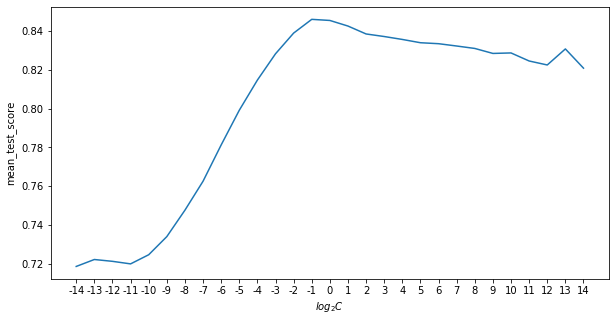

In [12]:
plt.figure(figsize=(10, 5))
plt.plot(np.arange(len(clf.cv_results_['mean_test_score'])), clf.cv_results_['mean_test_score'])
plt.xticks(np.arange(len(clf.cv_results_['mean_test_score'])), np.arange(-14, 15))
plt.xlabel("$log_2C$")
plt.ylabel("mean_test_score")
plt.show()

In [13]:
clf = LinearSVC(C=0.5)
scores = cross_val_score(clf, X_train, y_train)
print(np.mean(scores), "+/-", np.std(scores))

0.8459918530934554 +/- 0.005113870860876601
